In [ ]:
import pandas as pd
import numpy as np
!pip install efficient-apriori


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
 from efficient_apriori import apriori

In [ ]:
df = pd.read_csv('/content/1000i.csv', header=None, names=['receipt no.','food','quantity'])
df

,receipt no.,food,quantity
0,1,3,7
1,1,4,15
2,1,2,49
3,1,5,44
4,2,1,1
...,...,...,...
3533,999,5,35
3534,999,2,3
3535,1000,4,15
3536,1000,3,47


In [ ]:
dict = {
    1:"milk",2:"sugar",3:"chocolate",4:"apples",5:"curd"
}

In [ ]:
d1 = pd.DataFrame(df)
d1

,receipt no.,food,quantity
0,1,3,7
1,1,4,15
2,1,2,49
3,1,5,44
4,2,1,1
...,...,...,...
3533,999,5,35
3534,999,2,3
3535,1000,4,15
3536,1000,3,47


In [ ]:
d2 = pd.DataFrame(df)
d2

,receipt no.,food,quantity
0,1,3,7
1,1,4,15
2,1,2,49
3,1,5,44
4,2,1,1
...,...,...,...
3533,999,5,35
3534,999,2,3
3535,1000,4,15
3536,1000,3,47


In [ ]:
d2['food'].map(dict)

0       chocolate
1          apples
2           sugar
3            curd
4            milk
          ...    
3533         curd
3534        sugar
3535       apples
3536    chocolate
3537    chocolate
Name: food, Length: 3538, dtype: object

In [ ]:
d2

,receipt no.,food,quantity
0,1,3,7
1,1,4,15
2,1,2,49
3,1,5,44
4,2,1,1
...,...,...,...
3533,999,5,35
3534,999,2,3
3535,1000,4,15
3536,1000,3,47


In [ ]:
d1['food'] = d1['food'].replace(dict)
d1

,receipt no.,food,quantity
0,1,chocolate,7
1,1,apples,15
2,1,sugar,49
3,1,curd,44
4,2,milk,1
...,...,...,...
3533,999,curd,35
3534,999,sugar,3
3535,1000,apples,15
3536,1000,chocolate,47


In [ ]:
transactions = d1.groupby(d1['receipt no.'])['food'].apply(lambda x: list(x))
transactions

receipt no.
1                        [chocolate, apples, sugar, curd]
2                                           [milk, sugar]
3                                            [milk, milk]
4                    [milk, milk, curd, curd, milk, milk]
5                     [apples, apples, sugar, curd, curd]
                              ...                        
996     [chocolate, sugar, chocolate, curd, chocolate,...
997                      [chocolate, curd, apples, sugar]
998                 [milk, chocolate, curd, apples, curd]
999                                  [sugar, curd, sugar]
1000                       [apples, chocolate, chocolate]
Name: food, Length: 1000, dtype: object

In [ ]:
itemsets, rules = apriori(transactions, min_support=0.25, min_confidence=0.2)

In [ ]:
itemsets

{1: {('chocolate',): 507,
  ('apples',): 540,
  ('sugar',): 498,
  ('curd',): 493,
  ('milk',): 542},
 2: {('apples', 'chocolate'): 251,
  ('apples', 'curd'): 264,
  ('apples', 'milk'): 271,
  ('apples', 'sugar'): 258,
  ('chocolate', 'milk'): 251,
  ('milk', 'sugar'): 254}}

In [ ]:
rules

[{chocolate} -> {apples},
 {apples} -> {chocolate},
 {curd} -> {apples},
 {apples} -> {curd},
 {milk} -> {apples},
 {apples} -> {milk},
 {sugar} -> {apples},
 {apples} -> {sugar},
 {curd} -> {chocolate},
 {chocolate} -> {curd},
 {milk} -> {chocolate},
 {chocolate} -> {milk},
 {sugar} -> {chocolate},
 {chocolate} -> {sugar},
 {milk} -> {curd},
 {curd} -> {milk},
 {sugar} -> {curd},
 {curd} -> {sugar},
 {sugar} -> {milk},
 {milk} -> {sugar},
 {chocolate, curd} -> {apples},
 {apples, curd} -> {chocolate},
 {apples, chocolate} -> {curd},
 {curd} -> {apples, chocolate},
 {chocolate} -> {apples, curd},
 {apples} -> {chocolate, curd},
 {chocolate, milk} -> {apples},
 {apples, milk} -> {chocolate},
 {apples, chocolate} -> {milk},
 {milk} -> {apples, chocolate},
 {chocolate} -> {apples, milk},
 {apples} -> {chocolate, milk},
 {chocolate, sugar} -> {apples},
 {apples, sugar} -> {chocolate},
 {apples, chocolate} -> {sugar},
 {sugar} -> {apples, chocolate},
 {chocolate} -> {apples, sugar},
 {apple

In [ ]:
dict2 = {
    1:"Chocolate Cake",2:"Lemon Cake",3:"Casino Cake",4:"Opera Cake",5: "Strawberry Cake",6: "Truffle Cake",7: "Chocolate Eclair",8: "Coffee Eclair",9: "Vanilla Eclair",10: "Napolean Cake",11: "Almond Tart",12: "Apple Pie",13: "Apple Tart",14:"Apricot Tart",15: "Berry Tart",16: "Blackberry Tart",17: "Blueberry Tart",18: "Chocolate Tart",19: "Cherry Tart",20: "Lemon Tart",21: "Pecan Tart",22: "Ganache Cookie",23: "Gongolais Cookie",24: "Raspberry Cookie",25: "Lemon Cookie",26: "Chocolate Meringue",27: "Vanilla Meringue",28: "Marzipan Cookie",29: "Tuile Cookie",30: "Walnut Cookie",31: "Almond Croissant",32: "Apple Croissant",33: "Apricot Croissant",34: "Cheese Croissant",35: "Chocolate Croissant",36: "Apricot Danish",37: "Apple Danish",38: "Almond Twist",39: "Almond Bear_Claw",40: "Blueberry Danish",41: "Lemon Lemonade",42: "Raspberry Lemonade",43: "Orange Juice",44: "Green Tea",45: "Bottled Water",46: "Hot Coffee",47: "Chocolate Coffee",48: "Vanilla Frappucino",49: "Cherry Soda",0: "Single Espresso"
}

In [ ]:
df2 = pd.read_csv('/content/1000i.csv', header=None, names=['receipt no.','quantity','food'])

In [ ]:
d3 = pd.DataFrame(df2)

In [ ]:
d3['food'] = d3['food'].replace(dict2)

In [ ]:
d3

,receipt no.,quantity,food
0,1,3,Chocolate Eclair
1,1,4,Berry Tart
2,1,2,Cherry Soda
3,1,5,Green Tea
4,2,1,Chocolate Cake
...,...,...,...
3533,999,5,Chocolate Croissant
3534,999,2,Casino Cake
3535,1000,4,Berry Tart
3536,1000,3,Chocolate Coffee


In [ ]:
d3.groupby(d3['receipt no.'])['food'].apply(lambda x: list(x))

receipt no.
1       [Chocolate Eclair, Berry Tart, Cherry Soda, Gr...
2                           [Chocolate Cake, Cherry Tart]
3                           [Chocolate Cake, Cherry Tart]
4       [Chocolate Tart, Chocolate Croissant, Casino C...
5       [Opera Cake, Vanilla Eclair, Gongolais Cookie,...
                              ...                        
996     [Hot Coffee, Apricot Croissant, Almond Croissa...
997     [Ganache Cookie, Lemon Cake, Apple Croissant, ...
998     [Opera Cake, Vanilla Eclair, Single Espresso, ...
999     [Chocolate Tart, Chocolate Croissant, Casino C...
1000     [Berry Tart, Chocolate Coffee, Cheese Croissant]
Name: food, Length: 1000, dtype: object

In [ ]:
transaction2 = d3.groupby(d3['receipt no.'])['food'].apply(lambda x:list(x))

In [ ]:
itemset, rules = apriori(transaction2, min_support = 0.05, min_confidence = 0.02)

In [ ]:
itemset

{1: {('Chocolate Eclair',): 93,
  ('Berry Tart',): 73,
  ('Cherry Soda',): 59,
  ('Green Tea',): 77,
  ('Chocolate Cake',): 85,
  ('Cherry Tart',): 76,
  ('Chocolate Tart',): 84,
  ('Chocolate Croissant',): 75,
  ('Casino Cake',): 78,
  ('Opera Cake',): 91,
  ('Vanilla Eclair',): 90,
  ('Gongolais Cookie',): 82,
  ('Lemon Cake',): 72,
  ('Apricot Tart',): 95,
  ('Apple Pie',): 79,
  ('Almond Croissant',): 91,
  ('Apricot Danish',): 84,
  ('Vanilla Frappucino',): 77,
  ('Marzipan Cookie',): 102,
  ('Vanilla Meringue',): 90,
  ('Raspberry Cookie',): 66,
  ('Blueberry Danish',): 66,
  ('Lemon Lemonade',): 72,
  ('Orange Juice',): 62,
  ('Ganache Cookie',): 108,
  ('Strawberry Cake',): 103,
  ('Almond Bear_Claw',): 55,
  ('Blackberry Tart',): 81,
  ('Apple Croissant',): 76,
  ('Bottled Water',): 94,
  ('Almond Tart',): 68,
  ('Apple Danish',): 65,
  ('Chocolate Coffee',): 74,
  ('Apple Tart',): 56,
  ('Single Espresso',): 84,
  ('Raspberry Lemonade',): 82,
  ('Hot Coffee',): 85,
  ('Bluebe

In [ ]:
rules

[{Strawberry Cake} -> {Ganache Cookie},
 {Ganache Cookie} -> {Strawberry Cake},
 {Vanilla Meringue} -> {Marzipan Cookie},
 {Marzipan Cookie} -> {Vanilla Meringue}]

In [ ]:
x = []

for i in itemset.keys():
  x.append(pd.Series(itemset[i]))

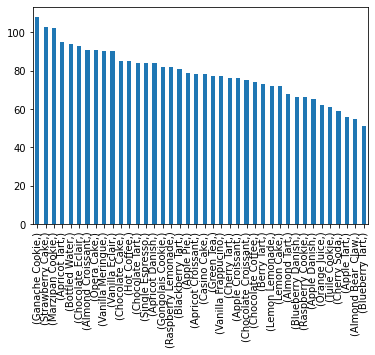

In [ ]:
x[0].sort_values(ascending = False).plot.bar()

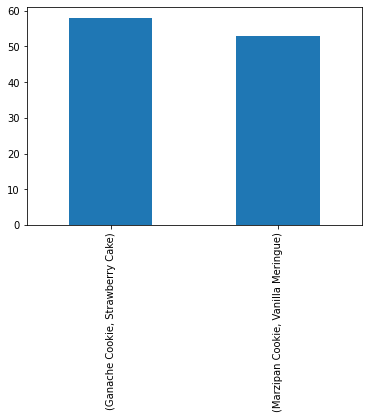

In [ ]:
x[1].plot.bar()